In [1]:
# Unsupervised Learning

# Molecular Dynamics of Water Transport Phenomena Through Carbons Nanotubes

In [2]:
# (1A) Exploratory Data Analysis

In [3]:
# importing libraries

In [4]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [5]:
# importing data

# note:
# for CNT Diameter (D = 1.49 nm), the driving force magnitude was F = 0.0006 
# for CNT Diameter (D = 2 nm), the driving force magnitude was F = 0.003 
# for all other CNT Diameters, the driving force magnitude was F = 0.001

# The Force is a normalized quantity that can be converted to Newtons with factor 3.42*10^-12 N

In [6]:
# 0.81 nm, CNT Diameter, F = 0.001
filepath_1 = 'data/CNT0.81.csv'
CNT081 = pd.read_csv(filepath_1)

# 0.95 nm, CNT Diameter, F = 0.001
filepath_2 = 'data/CNT0.95.csv'
CNT095 = pd.read_csv(filepath_2)

# 1.08 nm, CNT Diameter, F = 0.001
filepath_3 = 'data/CNT1.08.csv'
CNT108 = pd.read_csv(filepath_3)

# 1.1 nm, CNT Diameter, F = 0.001
filepath_4 = 'data/CNT1.1.csv'
CNT110 = pd.read_csv(filepath_4)

# 1.22 nm, CNT Diameter, F = 0.001
filepath_5 = 'data/CNT1.22.csv'
CNT122 = pd.read_csv(filepath_5)

# 1.36 nm, CNT Diameter, F = 0.001
filepath_6 = 'data/CNT1.36.csv'
CNT136 = pd.read_csv(filepath_6)

# 1.49 nm, CNT Diameter, F = 0.0006
filepath_7 = 'data/CNT_D_1.49_F_0.0006.csv'
CNT149 = pd.read_csv(filepath_7)

# 1.59 nm, CNT Diameter, F = 0.001
filepath_8 = 'data/CNT1.59.csv'
CNT159 = pd.read_csv(filepath_8)

# 2.00 nm, CNT Diameter, F = 0.003
filepath_9 = 'data/CNT_D_2_F_0.003.csv'
CNT200 = pd.read_csv(filepath_9)

# 3.00 nm, CNT Diameter, F = 0.001
filepath_10 = 'data/CNT3.csv'
CNT300 = pd.read_csv(filepath_10)

# 4.00 nm, CNT Diameter, F = 0.001
filepath_11 = 'data/CNT4.csv'
CNT400 = pd.read_csv(filepath_11)

In [7]:
# examining data set

In [8]:
# Multi-level-index dataframe with all values of CNT Diameter

# Combine all the coefficients into a dataframe
CNT_data = list()

CNT_Diameters = [81, 95, 108, 110, 122, 136, 149, 159, 200, 300, 400]
CNT_Diameter_Labels = ['81', '95', '108', '110', '122', '136', '149', '159', '200', '300', '400']
CNT_Models = [CNT081, CNT095, CNT108, CNT110, CNT122, CNT136, CNT149, CNT159, CNT200, CNT300, CNT400]

for lab, mod_ind in zip(CNT_Diameter_Labels, range(0,11)):
    mod = CNT_Models[mod_ind]
    col_label = pd.MultiIndex(levels=[[lab], ['Radius','Density']], 
                              codes =[[0,0], [0,1]], 
                              names =['Diameter (pm)', None] )
    
    CNT_data.append(pd.DataFrame(mod, columns=col_label))

    
CNT_data = (pd.concat(CNT_data, axis=1))


In [9]:
# Assign values to Data Frame

for ind in range(0,11):
    
    diameter_value = CNT_Diameters[ind]
    
    # index and assign values to multi-level-index data frame
    r_ind = (2*ind)
    CNT_data.iloc[:,[r_ind]]= CNT_Models[ind]['Radius']
    d_ind = (r_ind + 1)
    CNT_data.iloc[:,[d_ind]]= CNT_Models[ind]['Density']
    
CNT_data

Diameter (pm)            81                         95              \
                     Radius      Density        Radius     Density   
0              8.300000e-12  1771.826029  9.690000e-12   96.212845   
1              2.000000e-11  1893.003052  2.340000e-11  100.710938   
2              2.610000e-11  2016.161799  3.050000e-11  105.434675   
3              3.100000e-11  2140.651023  3.620000e-11  110.523559   
4              3.520000e-11  2264.489690  4.100000e-11  115.914094   
..                      ...          ...           ...         ...   
595            4.050000e-10     0.000000  4.730000e-10    0.000000   
596            4.060000e-10     0.000000  4.730000e-10    0.000000   
597            4.060000e-10     0.000000  4.740000e-10    0.000000   
598            4.060000e-10     0.000000  4.740000e-10    0.000000   
599            4.070000e-10     0.000000  4.740000e-10    0.000000   

Diameter (pm)           108                     110                     122  \
                     Radius   Density        Radius   Density        Radius   
0              1.110000e-11  0.066517  1.130000e-11  1.926296  1.250000e-11   
1              2.670000e-11  0.118421  2.730000e-11  2.828274  3.010000e-11   
2              3.480000e-11  0.187613  3.560000e-11  3.891491  3.920000e-11   
3              4.130000e-11  0.286196  4.230000e-11  5.192489  4.650000e-11   
4              4.690000e-11  0.418507  4.800000e-11  6.613584  5.280000e-11   
..                      ...       ...           ...       ...           ...   
595            5.400000e-10  0.000000  5.530000e-10  0.000000  6.080000e-10   
596            5.410000e-10  0.000000  5.530000e-10  0.000000  6.080000e-10   
597            5.410000e-10  0.000000  5.540000e-10  0.000000  6.090000e-10   
598            5.420000e-10  0.000000  5.540000e-10  0.000000  6.090000e-10   
599            5.420000e-10  0.000000  5.550000e-10  0.000000  6.100000e-10   

Diameter (pm)               ...           149                        159  \
                   Density  ...        Radius      Density        Radius   
0              1179.808362  ...  1.520000e-11  1142.328093  1.620000e-11   
1               935.064907  ...  3.680000e-11  1156.453405  3.900000e-11   
2               760.097200  ...  4.790000e-11  1173.902237  5.080000e-11   
3               635.595336  ...  5.680000e-11  1191.958791  6.030000e-11   
4               547.586891  ...  6.450000e-11  1211.247253  6.850000e-11   
..                     ...  ...           ...          ...           ...   
595               0.000000  ...  7.430000e-10     0.000000  7.890000e-10   
596               0.000000  ...  7.440000e-10     0.000000  7.890000e-10   
597               0.000000  ...  7.440000e-10     0.000000  7.900000e-10   
598               0.000000  ...  7.450000e-10     0.000000  7.910000e-10   
599               0.000000  ...  7.450000e-10     0.000000  7.910000e-10   

Diameter (pm)                       200                        300  \
                  Density        Radius      Density        Radius   
0              553.342248  2.080000e-11  1596.822293  3.040000e-11   
1              584.217610  5.010000e-11  1472.771661  7.350000e-11   
2              616.671867  6.530000e-11  1373.062298  9.580000e-11   
3              649.585247  7.750000e-11  1288.001628  1.140000e-10   
4              683.669243  8.790000e-11  1219.116062  1.290000e-10   
..                    ...           ...          ...           ...   
595              0.000000  1.010000e-09     0.000000  1.490000e-09   
596              0.000000  1.010000e-09     0.000000  1.490000e-09   
597              0.000000  1.010000e-09     0.000000  1.490000e-09   
598              0.000000  1.020000e-09     0.000000  1.490000e-09   
599              0.000000  1.020000e-09     0.000000  1.490000e-09   

Diameter (pm)                        400               
                   Density        Radius      Density  
0              1194.829696  4.150000e-11  1033.65

In [10]:
# column names, number of examples and data type
CNT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (81, Radius)    600 non-null    float64
 1   (81, Density)   600 non-null    float64
 2   (95, Radius)    600 non-null    float64
 3   (95, Density)   600 non-null    float64
 4   (108, Radius)   600 non-null    float64
 5   (108, Density)  600 non-null    float64
 6   (110, Radius)   600 non-null    float64
 7   (110, Density)  600 non-null    float64
 8   (122, Radius)   600 non-null    float64
 9   (122, Density)  600 non-null    float64
 10  (136, Radius)   600 non-null    float64
 11  (136, Density)  600 non-null    float64
 12  (149, Radius)   600 non-null    float64
 13  (149, Density)  600 non-null    float64
 14  (159, Radius)   600 non-null    float64
 15  (159, Density)  600 non-null    float64
 16  (200, Radius)   600 non-null    float64
 17  (200, Density)  600 non-null    flo

In [11]:
# descriptive analytics of dataset
CNT_data.describe()

Diameter (pm)            81                         95               \
                     Radius      Density        Radius      Density   
count          6.000000e+02   600.000000  6.000000e+02   600.000000   
mean           2.711887e-10   224.405348  3.163723e-10   302.392296   
std            9.599894e-11   772.010952  1.119771e-10   858.448900   
min            8.300000e-12     0.000000  9.690000e-12     0.000000   
25%            2.037500e-10     0.000000  2.377500e-10     0.000000   
50%            2.875000e-10     0.000000  3.355000e-10     0.000000   
75%            3.520000e-10     0.000000  4.110000e-10     0.000000   
max            4.070000e-10  3705.012642  4.740000e-10  3879.508628   

Diameter (pm)           108                        110               \
                     Radius      Density        Radius      Density   
count          6.000000e+02   600.000000  6.000000e+02   600.000000   
mean           3.615897e-10   449.289615  3.699672e-10   471.321736   
std            1.279687e-10  1166.366878  1.309246e-10  1154.018545   
min            1.110000e-11     0.000000  1.130000e-11     0.000000   
25%            2.717500e-10     0.000000  2.777500e-10     0.000000   
50%            3.835000e-10     0.000000  3.925000e-10     0.000000   
75%            4.692500e-10     1.820035  4.802500e-10    20.255918   
max            5.420000e-10  4792.222751  5.550000e-10  4767.582842   

Diameter (pm)           122               ...           149               \
                     Radius      Density  ...        Radius      Density   
count          6.000000e+02   600.000000  ...  6.000000e+02   600.000000   
mean           4.067922e-10   452.943743  ...  4.971925e-10   544.541413   
std            1.439586e-10   870.194128  ...  1.759552e-10   831.464679   
min            1.250000e-11     0.000000  ...  1.520000e-11     0.000000   
25%            3.057500e-10     0.000000  ...  3.735000e-10     0.000000   
50%            4.315000e-10     0.000000  ...  5.275000e-10     0.000000   
75%            5.282500e-10   481.480756  ...  6.460000e-10   862.863370   
max            6.100000e-10  3186.750416  ...  7.450000e-10  3082.856417   

Diameter (pm)           159                        200               \
                     Radius      Density        Radius      Density   
count          6.000000e+02   600.000000  6.000000e+02   600.000000   
mean           5.277602e-10   578.398802  6.779432e-10   672.147410   
std            1.867770e-10   859.208871  2.398989e-10   806.884162   
min            1.620000e-11     0.000000  2.080000e-11     0.000000   
25%            3.957500e-10     0.000000  5.087500e-10     0.000000   
50%            5.595000e-10     0.000000  7.195000e-10   550.294112   
75%            6.852500e-10   883.751393  8.802500e-10  1073.177626   
max            7.910000e-10  3193.518280  1.020000e-09  3102.588129   

Diameter (pm)           300                        400               
                     Radius      Density        Radius      Density  
count          6.000000e+02   600.000000  6.000000e+02   600.000000  
mean           9.944128e-10   784.086232  1.356006e-09   857.361839  
std            3.519496e-10   721.231595  4.798350e-10   658.575350  
min            3.040000e-11     0.000000  4.150000e-11     0.000000  
25%            7.465000e-10     0.000000  1.020000e-09   315.073702  
50%            1.055000e-09   892.819656  1.440000e-09   992.367544  
75%            1.290000e-09  1111.852513  1.760000e-09  1091.194496  
max            1.490000e-09  3076.782869  2.030000e-09  3172.156312  

[8 rows x 22 columns]

In [12]:
# Compare number of zeros across data sets, number of unique values

# initialize metric lists
zeros = []
unique_list = []


for ind in range(0,11):
    CNT_D = CNT_Diameter_Labels[ind]
    X = CNT_data[CNT_D]
    
    # calculate number of unique density values in data set
    unique_vals = X['Density'].nunique()
    
    # calculate number of density values equal to zero
    num_zeros = ((X['Density']==0).value_counts())[1]    

    # append value to lists 
    zeros.append(num_zeros)
    unique_list.append(unique_vals)

zeros

[504, 452, 418, 406, 371, 349, 320, 302, 247, 174, 130]

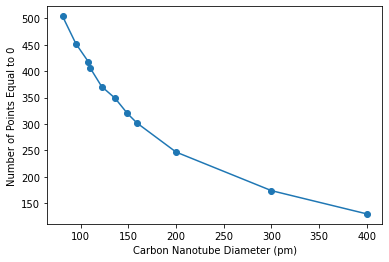

In [13]:
# Compare number of density values equal to zero vs data set with plot

# More values for zero will lead to lower inertia and distortion values

# plot data
plt.plot(CNT_Diameters, zeros)
plt.scatter(CNT_Diameters, zeros)
plt.xlabel('Carbon Nanotube Diameter (pm)')
plt.ylabel('Number of Points Equal to 0');

In [14]:
# descriptive analytics of dataset
CNT_data.describe()

Diameter (pm)            81                         95               \
                     Radius      Density        Radius      Density   
count          6.000000e+02   600.000000  6.000000e+02   600.000000   
mean           2.711887e-10   224.405348  3.163723e-10   302.392296   
std            9.599894e-11   772.010952  1.119771e-10   858.448900   
min            8.300000e-12     0.000000  9.690000e-12     0.000000   
25%            2.037500e-10     0.000000  2.377500e-10     0.000000   
50%            2.875000e-10     0.000000  3.355000e-10     0.000000   
75%            3.520000e-10     0.000000  4.110000e-10     0.000000   
max            4.070000e-10  3705.012642  4.740000e-10  3879.508628   

Diameter (pm)           108                        110               \
                     Radius      Density        Radius      Density   
count          6.000000e+02   600.000000  6.000000e+02   600.000000   
mean           3.615897e-10   449.289615  3.699672e-10   471.321736   
std            1.279687e-10  1166.366878  1.309246e-10  1154.018545   
min            1.110000e-11     0.000000  1.130000e-11     0.000000   
25%            2.717500e-10     0.000000  2.777500e-10     0.000000   
50%            3.835000e-10     0.000000  3.925000e-10     0.000000   
75%            4.692500e-10     1.820035  4.802500e-10    20.255918   
max            5.420000e-10  4792.222751  5.550000e-10  4767.582842   

Diameter (pm)           122               ...           149               \
                     Radius      Density  ...        Radius      Density   
count          6.000000e+02   600.000000  ...  6.000000e+02   600.000000   
mean           4.067922e-10   452.943743  ...  4.971925e-10   544.541413   
std            1.439586e-10   870.194128  ...  1.759552e-10   831.464679   
min            1.250000e-11     0.000000  ...  1.520000e-11     0.000000   
25%            3.057500e-10     0.000000  ...  3.735000e-10     0.000000   
50%            4.315000e-10     0.000000  ...  5.275000e-10     0.000000   
75%            5.282500e-10   481.480756  ...  6.460000e-10   862.863370   
max            6.100000e-10  3186.750416  ...  7.450000e-10  3082.856417   

Diameter (pm)           159                        200               \
                     Radius      Density        Radius      Density   
count          6.000000e+02   600.000000  6.000000e+02   600.000000   
mean           5.277602e-10   578.398802  6.779432e-10   672.147410   
std            1.867770e-10   859.208871  2.398989e-10   806.884162   
min            1.620000e-11     0.000000  2.080000e-11     0.000000   
25%            3.957500e-10     0.000000  5.087500e-10     0.000000   
50%            5.595000e-10     0.000000  7.195000e-10   550.294112   
75%            6.852500e-10   883.751393  8.802500e-10  1073.177626   
max            7.910000e-10  3193.518280  1.020000e-09  3102.588129   

Diameter (pm)           300                        400               
                     Radius      Density        Radius      Density  
count          6.000000e+02   600.000000  6.000000e+02   600.000000  
mean           9.944128e-10   784.086232  1.356006e-09   857.361839  
std            3.519496e-10   721.231595  4.798350e-10   658.575350  
min            3.040000e-11     0.000000  4.150000e-11     0.000000  
25%            7.465000e-10     0.000000  1.020000e-09   315.073702  
50%            1.055000e-09   892.819656  1.440000e-09   992.367544  
75%            1.290000e-09  1111.852513  1.760000e-09  1091.194496  
max            1.490000e-09  3076.782869  2.030000e-09  3172.156312  

[8 rows x 22 columns]

In [15]:
# Combine all Data in 3 Dimensional Data Set

# initialize data set
total_mod = []
diameters = []

# Assign values to Data Frame
for ind in range(0,11):
    
    CNT_D = CNT_Diameters[ind]
    mod_label = CNT_Diameter_Labels[ind]
        
    # iterate through models
    mod = CNT_data[mod_label]
    
    # number of examples in model
    length_mod = mod.shape[0]
    
    for ix in range(0,length_mod):
        diameters.append(CNT_Diameters[ind])
    
    # append rows
    total_mod.append(pd.DataFrame(data = mod, columns = ['Radius','Density']))

# concatenate data set
All_data = pd.concat(total_mod)

All_data['CNT_Diameter'] = diameters

All_data

,Radius,Density,CNT_Diameter
0,8.300000e-12,1771.826029,81
1,2.000000e-11,1893.003052,81
2,2.610000e-11,2016.161799,81
3,3.100000e-11,2140.651023,81
4,3.520000e-11,2264.489690,81
...,...,...,...
595,2.030000e-09,0.000000,400
596,2.030000e-09,0.000000,400
597,2.030000e-09,0.000000,400
598,2.030000e-09,0.000000,400


array([[<AxesSubplot:title={'center':'Radius'}>,
        <AxesSubplot:title={'center':'Density'}>],
       [<AxesSubplot:title={'center':'CNT_Diameter'}>, <AxesSubplot:>]],
      dtype=object)

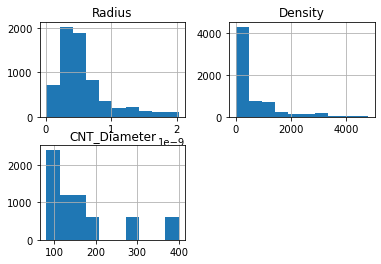

In [16]:
# clean aggregate data set, histograms
All_data.hist()

In [17]:
# unique values for CNT Diameter (after removing rows with zeros)
All_data['CNT_Diameter'].unique()

array([ 81,  95, 108, 110, 122, 136, 149, 159, 200, 300, 400])

In [18]:
# set visualization parameters

plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

In [19]:
# frequency distribution of density for CNT's

<AxesSubplot:>

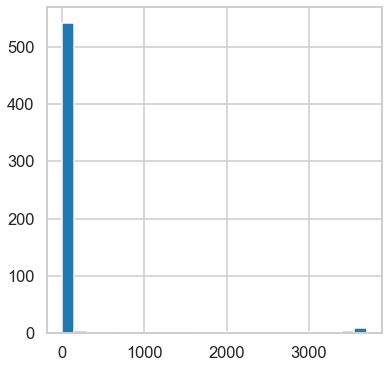

In [20]:
CNT_data['81', 'Density'].hist(bins=25)

<AxesSubplot:>

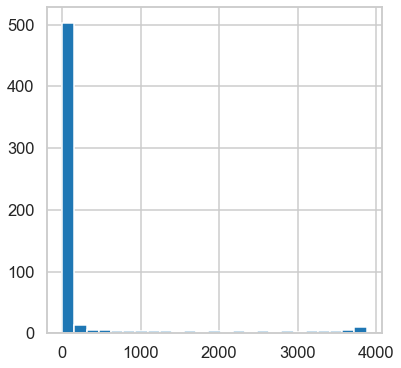

In [21]:
CNT_data['95', 'Density'].hist(bins=25)

<AxesSubplot:>

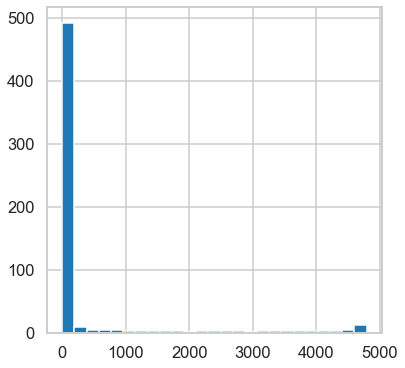

In [22]:
CNT_data['108', 'Density'].hist(bins=25)

<AxesSubplot:>

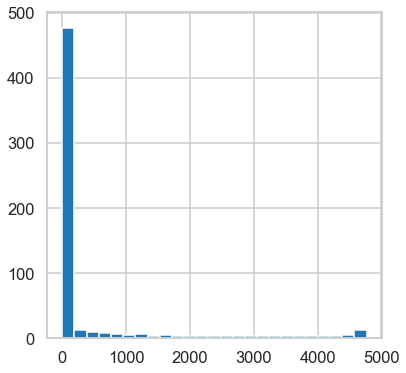

In [23]:
CNT_data['110', 'Density'].hist(bins=25)

<AxesSubplot:>

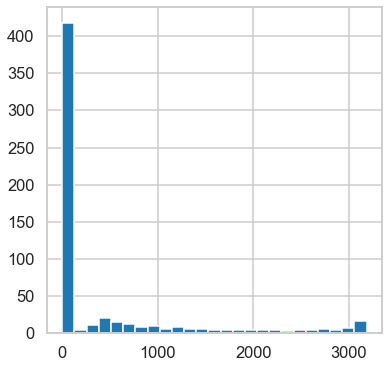

In [24]:
CNT_data['122', 'Density'].hist(bins=25)

<AxesSubplot:>

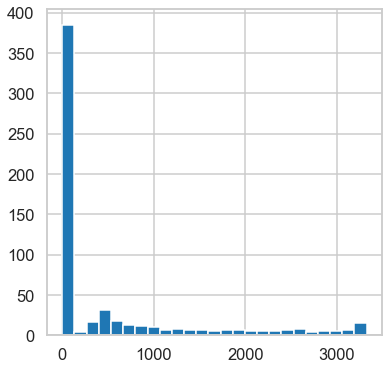

In [25]:
CNT_data['136', 'Density'].hist(bins=25)

<AxesSubplot:>

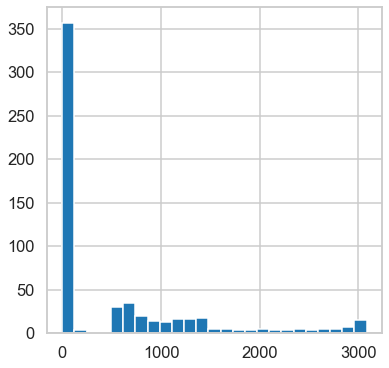

In [26]:
CNT_data['149', 'Density'].hist(bins=25)

<AxesSubplot:>

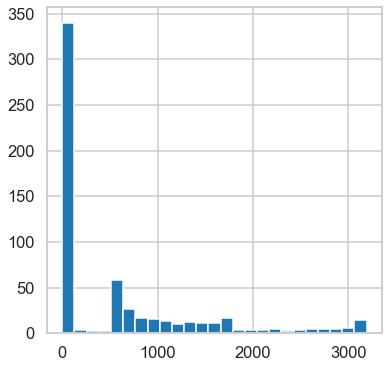

In [27]:
CNT_data['159', 'Density'].hist(bins=25)

<AxesSubplot:>

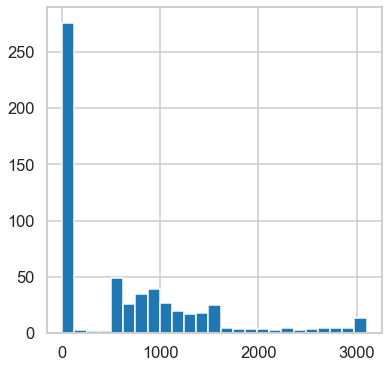

In [28]:
CNT_data['200', 'Density'].hist(bins=25)

<AxesSubplot:>

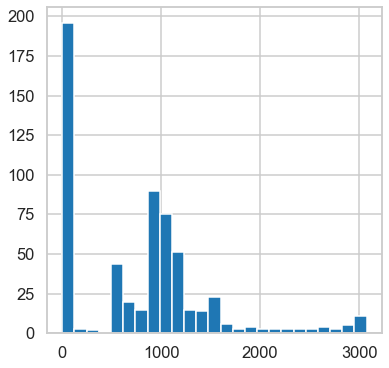

In [29]:
CNT_data['300', 'Density'].hist(bins=25)

<AxesSubplot:>

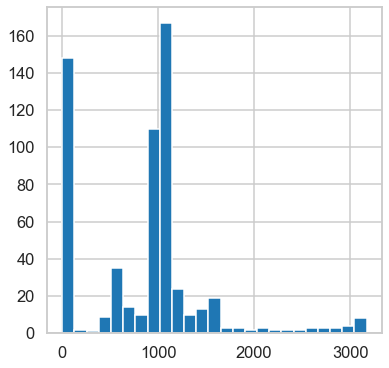

In [30]:
CNT_data['400', 'Density'].hist(bins=25)

In [31]:
# (2) Unsupervised Machine Learning Clustering Algorithms

In [32]:
# (2A) Define Functions for Unsupervised Machine Learning 

In [33]:
# cluster plotting function

# displays data in 2 dimensions and highlights the clusters up to 7 colors

def display_cluster(X,km=[],num_clusters=0):
    
    # color list ie., blue, red, green, etc.
    color = 'rygbcmk'
    # transparency of color
    alpha = 0.5
    # marker size
    s = 20
    
    # y-coordinates of cluster centroids
    cc_j = pd.DataFrame(km.cluster_centers_[:,1]).sort_values(by=0, ascending=False).index.tolist()
    
    # for no clusters create scatter plot
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    
    # for num_clusters > 0, create scatter plot of points and centroids and label 
    else: 
        # color coding based on maximum y-coordinates
        for i in range(num_clusters):

            j = cc_j[i]
            plt.scatter(X[km.labels_==j,0],X[km.labels_==j,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[j][0],km.cluster_centers_[j][1],c = color[i], marker = 'x', s = 100)

In [34]:
# comparing labels from algorithm for different CNT Diameters

def Label_Clusters(X,km=[],num_clusters=0):
    
    # initialize empty lists
    data_labels_list = []
    
    # clustering algorithm
    km = []
    km = KMeans(n_clusters=num_clusters, random_state = 27018)
    km.fit(X)
    
    # copy unlabeled data set
    Data_Labels = X.copy()

    # add row with cluster label attached
    Data_Labels['Cluster Label'] = ((km.labels_)+1)

    return Data_Labels


In [35]:

# Define function to compute distortion metric within each individual cluster

# (1) check number of elements in cluster
# (2) for each cluster compute squared distance between centroid and points
# (3) calcuate distortion for each individual cluster

# Use to assess similarity of points within each cluster

def cluster_distortions(X,km=[],num_clusters=0):

    # output lists
    distortion_output = []
    cluster_label = []
    
    # clustering algorithm
    #km = KMeans(n_clusters=num_clusters)
    #km.fit(X)
    
    # y-coordinates of cluster centroids
    cc_j = pd.DataFrame(km.cluster_centers_[:,1]).sort_values(by=0, ascending=False).index.tolist()
    
    for i in range(num_clusters):
        
        # indice to group together cluster based on maximum y-coordinate
        j = cc_j[i]
        
        # label for each data point
        row_label = pd.DataFrame(km.labels_)
        
        # filtering to points cooresponding to single label
        label_test = row_label.loc[row_label[0] == j]
        Xlabel = X.iloc[label_test.index]
            
        # create an array with the same shape as the data frame
        
        # fill columns with coordinates for cluster centroid
        cc = np.full(shape=(Xlabel.shape[0],Xlabel.shape[1]), 
                     fill_value=[km.cluster_centers_[j,0], km.cluster_centers_[j,1]])
        
        # distortion values, euclidean distance 
        distortion_val = (sum(np.min(cdist(Xlabel, cc, 'euclidean'), axis=1))) / Xlabel.shape[0]

        # append disortion value to list
        distortion_output.append(distortion_val)
        cluster_label.append(j+1)
    
    # label for each cluster
    clusters = cluster_label
        
    # create dataframe of distortion values
    distortion_output = pd.DataFrame(distortion_output)
    distortion_output = distortion_output.rename(columns={0:"Distortion"})
    
    # add row with cluster label attached
    distortion_output['Cluster Label'] = clusters
    
    # returns dataframe with distortion calculation and associated cluster label
    return distortion_output

In [36]:
# (2B) K-Means Clustering

In [37]:
# Optimizing Number of Clusters

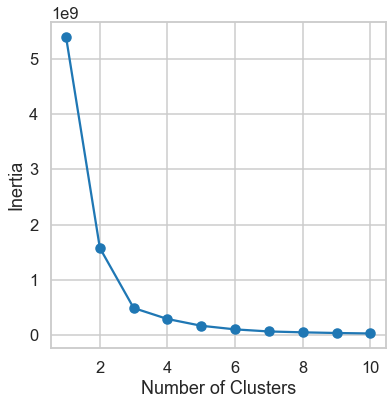

In [38]:
# remove 'CNT Diameter' column from dataset before 
    
    # (i) optimizing number of cluster
    # (ii) calculating distortion

Cluster_data = All_data.drop(columns='CNT_Diameter')

# initialize empty list
opt_inertia = []

# number of clusters range that will be optimized over
list_num_clusters = list(range(1,11))

for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, random_state = 27018)
    km.fit(Cluster_data)
    opt_inertia.append(km.inertia_)
    
plt.plot(list_num_clusters, opt_inertia)
plt.scatter(list_num_clusters, opt_inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [39]:
# optimal number of clusters determined from,
# where slope of inertia change with respect to
# the number of clusters approaches zero

# Clustering such that structure can be identified within the dataset

# optimized value of num_clusters
n_opt = 6 

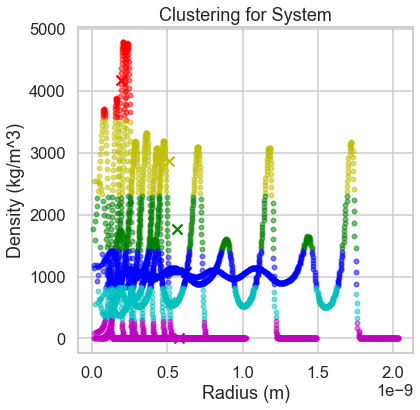

In [40]:
# clustering algorithm
km = KMeans(n_clusters=n_opt, random_state = 27018)
km.fit(Cluster_data)

#  visualization of clustering
display_cluster(Cluster_data.to_numpy(),km, num_clusters= n_opt)

# title & axis labels
plt.title('Clustering for System')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)');

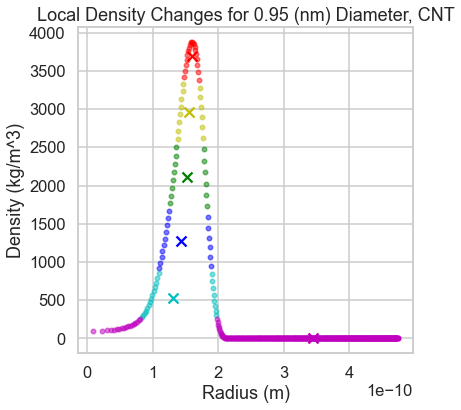

In [41]:
# extracting data
X = All_data.loc[All_data['CNT_Diameter'] == 95]
X = X.drop(columns='CNT_Diameter')

# clustering algorithm
km = KMeans(n_clusters=n_opt, random_state = 27018)
km.fit(X)

# visualization of clustering
display_cluster(X.to_numpy(),km, num_clusters= n_opt)

# title & axis labels
plt.title('Local Density Changes for 0.95 (nm) Diameter, CNT')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)');

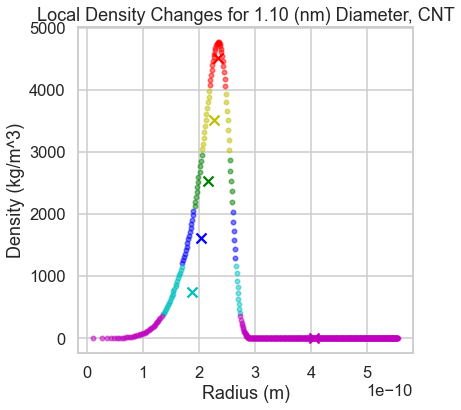

In [42]:
# extracting data
X = All_data.loc[All_data['CNT_Diameter'] == 110]
X = X.drop(columns='CNT_Diameter')

# clustering algorithm
km = KMeans(n_clusters=n_opt, random_state = 27018)
km.fit(X)

# visualization of clustering
display_cluster(X.to_numpy(),km, num_clusters= n_opt)

# title & axis labels
plt.title('Local Density Changes for 1.10 (nm) Diameter, CNT')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)');

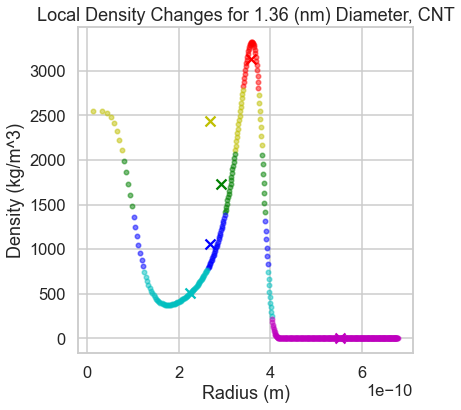

In [43]:
# extracting data
X = All_data.loc[All_data['CNT_Diameter'] == 136]
X = X.drop(columns='CNT_Diameter')

# clustering algorithm
km = KMeans(n_clusters=n_opt, random_state = 27018)
km.fit(X)

# visualization of clustering
display_cluster(X.to_numpy(),km, num_clusters= n_opt)

# title & axis labels
plt.title('Local Density Changes for 1.36 (nm) Diameter, CNT')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)');

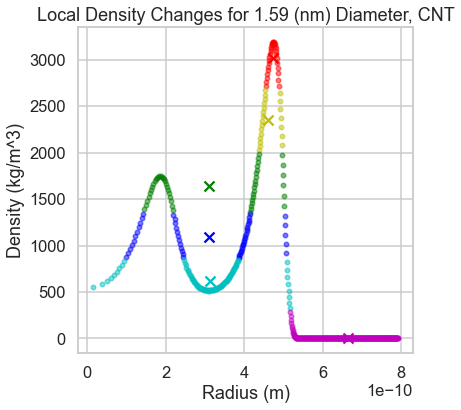

In [44]:
# extracting data
X = All_data.loc[All_data['CNT_Diameter'] == 159]
X = X.drop(columns='CNT_Diameter')

# clustering algorithm
km = KMeans(n_clusters=n_opt, random_state = 27018)
km.fit(X)

# visualization of clustering
display_cluster(X.to_numpy(),km, num_clusters= n_opt)

# title & axis labels
plt.title('Local Density Changes for 1.59 (nm) Diameter, CNT')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)');

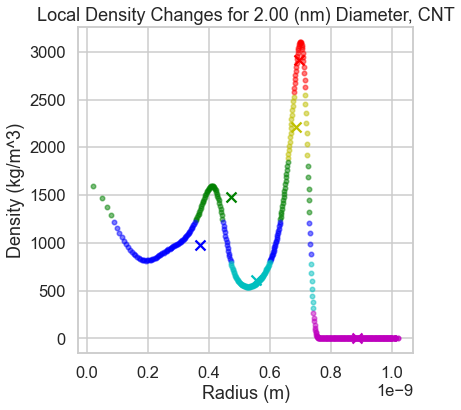

In [45]:
# extracting data
X = All_data.loc[All_data['CNT_Diameter'] == 200]
X = X.drop(columns='CNT_Diameter')

# clustering algorithm
km = KMeans(n_clusters=n_opt, random_state = 27018)
km.fit(X)

# visualization of clustering
display_cluster(X.to_numpy(),km, num_clusters= n_opt)

# title & axis labels
plt.title('Local Density Changes for 2.00 (nm) Diameter, CNT')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)');

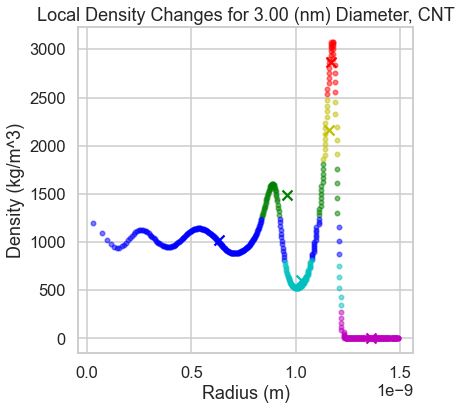

In [46]:
# extracting data
X = All_data.loc[All_data['CNT_Diameter'] == 300]
X = X.drop(columns='CNT_Diameter')

# clustering algorithm
km = KMeans(n_clusters=n_opt, random_state = 27018)
km.fit(X)

# visualization of clustering
display_cluster(X.to_numpy(),km, num_clusters= n_opt)

# title & axis labels
plt.title('Local Density Changes for 3.00 (nm) Diameter, CNT')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)');

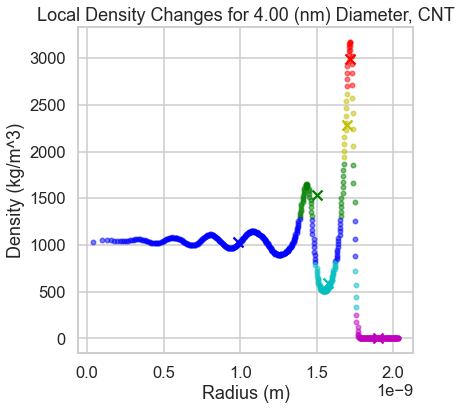

In [47]:
# extracting data
X = All_data.loc[All_data['CNT_Diameter'] == 400]
X = X.drop(columns='CNT_Diameter')

# clustering algorithm
km = KMeans(n_clusters=n_opt, random_state = 27018)
km.fit(X)

# visualization of clustering
display_cluster(X.to_numpy(),km, num_clusters= n_opt)

# title & axis labels
plt.title('Local Density Changes for 4.00 (nm) Diameter, CNT')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)');

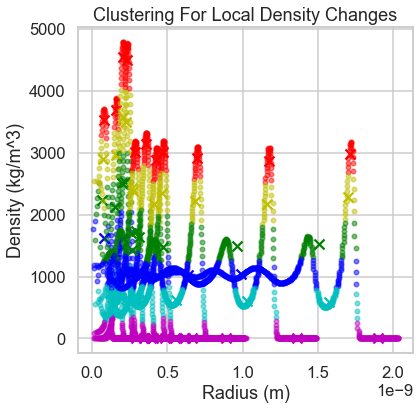

In [48]:
# Compare Inertia and Distortion for Different Clusters, With Zeros

# initialize metric lists
inertia_list = []
distortion_list = []

# individual cluster comparisons
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []
cluster_6 = []

# individual cluster parameters
clusters_list = (cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6)


# using optimized number of clusters
 
# select number of clusters (3,4)
num_clusters = n_opt

for idx in list(range(0,11)):
    
    CNT_D = CNT_Diameters[idx]
    X = All_data.loc[All_data['CNT_Diameter'] == CNT_D]
    X = X.drop(columns='CNT_Diameter')

    # clustering algorithm
    km = KMeans(n_clusters=num_clusters, random_state = 27018)
    km.fit(X)
    
    # visualization of clustering
    display_cluster(X.to_numpy(),km, num_clusters= n_opt)

    # sample size normalized inertia values
    inertia_val = km.inertia_/ X.shape[0]
    
    # summed distortion values, squared euclidean distance
    distortion_val = ((cluster_distortions(X, km, num_clusters=n_opt))['Distortion']).sum()
    
    # extracts value from distortion dataframe and appends individual distortion value from respective cluster
    # to list of distortion values for that individual cluster to compare distortion across clusters 
    
    # compare for (i = 1 to n_opt)
    for cluster_i in list(range(0,(n_opt))):
        
        # distortion values, squared euclidean distance
        distortion_val_i = ((cluster_distortions(X, km, num_clusters=n_opt))['Distortion'])[cluster_i]
        
        # append individual cluster distortion value to lists 
        clusters_list[cluster_i].append(distortion_val_i)
    
    # append value to lists 
    inertia_list.append(inertia_val)
    distortion_list.append(distortion_val)

# title & axis labels
plt.title('Clustering For Local Density Changes')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)');

In [49]:
# Compare distortion between each clustering group

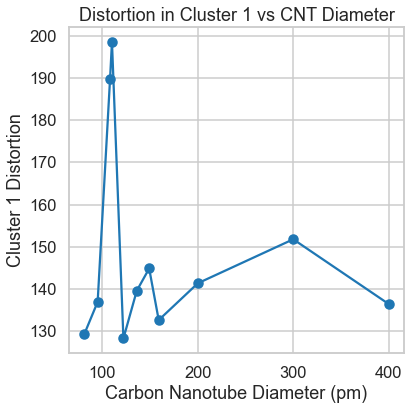

In [50]:
# plot data
plt.plot(CNT_Diameters, cluster_1)
plt.scatter(CNT_Diameters, cluster_1)

# title & axis labels
plt.title('Distortion in Cluster 1 vs CNT Diameter')
plt.xlabel('Carbon Nanotube Diameter (pm)')
plt.ylabel('Cluster 1 Distortion');

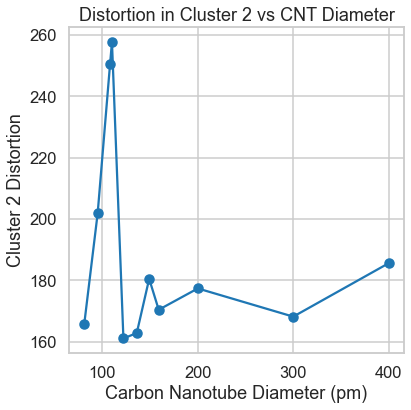

In [51]:
# plot data
plt.plot(CNT_Diameters, cluster_2)
plt.scatter(CNT_Diameters, cluster_2)

# title & axis labels
plt.title('Distortion in Cluster 2 vs CNT Diameter')
plt.xlabel('Carbon Nanotube Diameter (pm)')
plt.ylabel('Cluster 2 Distortion');

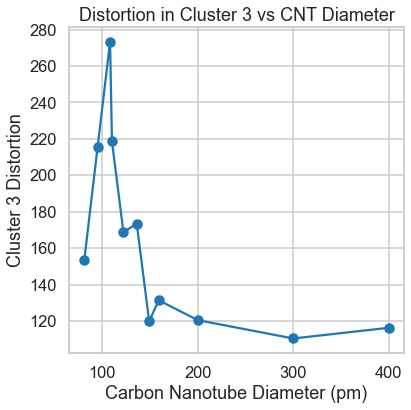

In [52]:
# plot data
plt.plot(CNT_Diameters, cluster_3)
plt.scatter(CNT_Diameters, cluster_3)

# title & axis labels
plt.title('Distortion in Cluster 3 vs CNT Diameter')
plt.xlabel('Carbon Nanotube Diameter (pm)')
plt.ylabel('Cluster 3 Distortion');

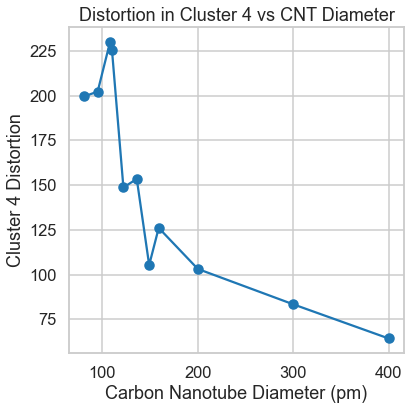

In [53]:
# plot data
plt.plot(CNT_Diameters, cluster_4)
plt.scatter(CNT_Diameters, cluster_4)

# title & axis labels
plt.title('Distortion in Cluster 4 vs CNT Diameter')
plt.xlabel('Carbon Nanotube Diameter (pm)')
plt.ylabel('Cluster 4 Distortion');

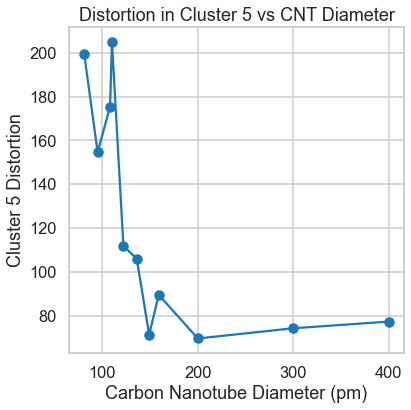

In [54]:
# plot data
plt.plot(CNT_Diameters, cluster_5)
plt.scatter(CNT_Diameters, cluster_5)

# title & axis labels
plt.title('Distortion in Cluster 5 vs CNT Diameter')
plt.xlabel('Carbon Nanotube Diameter (pm)')
plt.ylabel('Cluster 5 Distortion');

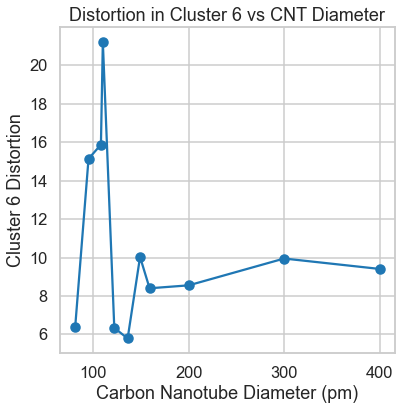

In [55]:
# plot data
plt.plot(CNT_Diameters, cluster_6)
plt.scatter(CNT_Diameters, cluster_6)

# title & axis labels
plt.title('Distortion in Cluster 6 vs CNT Diameter')
plt.xlabel('Carbon Nanotube Diameter (pm)')
plt.ylabel('Cluster 6 Distortion');

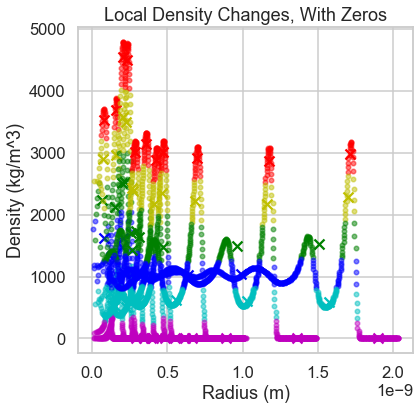

In [56]:
# Compare Inertia and Distortion for Different Clusters, With Zeros

# initialize metric lists
inertia_list = []
distortion_list = []

# using optimized number of clusters
num_clusters = n_opt


for idx in list(range(0,11)):
    
    # extract data for each carbon nanotube diameter
    CNT_D = CNT_Diameters[idx]    
    X = All_data.loc[All_data['CNT_Diameter'] == CNT_D]
    
    # drop column for carbon nanotube diameter 
    X = X.drop(columns='CNT_Diameter')

    # clustering algorithm
    km = KMeans(n_clusters=num_clusters, random_state = 27018)
    km.fit(X)

    # visualization of clustering
    display_cluster(X.to_numpy(),km, num_clusters= n_opt)
    
    # sample size normalized inertia values
    inertia_val = km.inertia_/ X.shape[0]
    
    # summed distortion values, squared euclidean distance
    distortion_val = ((cluster_distortions(X, km, num_clusters=n_opt))['Distortion']).sum()
        
    # append value to lists 
    inertia_list.append(inertia_val)
    distortion_list.append(distortion_val)

# axis title & labels
plt.title('Local Density Changes, With Zeros')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)');   

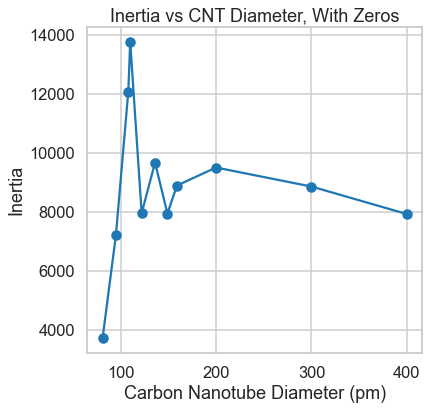

In [57]:
# Plot of Inertia vs CNT Diameter, With Zeros

# Sum of square distance between point xi and cluster centroid location
# Metric for similar number of points between clusters

# plot data
plt.plot(CNT_Diameters, inertia_list)
plt.scatter(CNT_Diameters, inertia_list)

# title & axis labels
plt.title('Inertia vs CNT Diameter, With Zeros')
plt.xlabel('Carbon Nanotube Diameter (pm)')
plt.ylabel('Inertia');

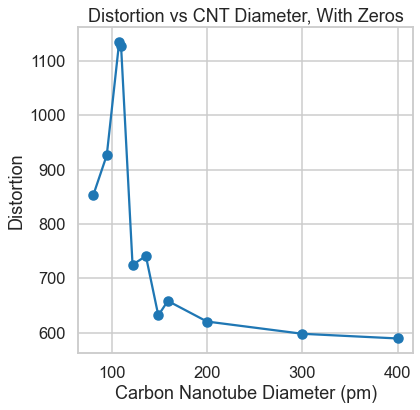

In [58]:
# Plot of Distortion vs CNT Diameter, With Zeros

# Sum of average squared distance between point xi and cluster centroid location

# Metric for similarity of points within clusters,
# smaller value cooresponds to tighter cluster

# plot data
plt.plot(CNT_Diameters, distortion_list)
plt.scatter(CNT_Diameters, distortion_list)

# title & axis labels
plt.title('Distortion vs CNT Diameter, With Zeros')
plt.xlabel('Carbon Nanotube Diameter (pm)')
plt.ylabel('Distortion');

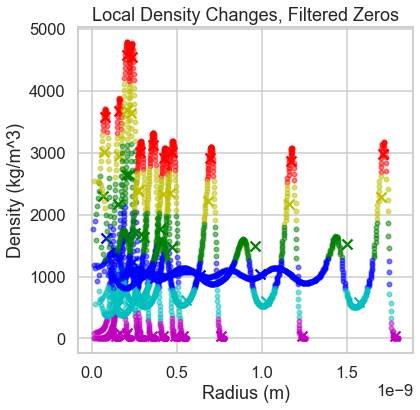

In [59]:
# Compare Inertia and Distortion for Different Clusters, Filtered Zeros

# initialize metric lists
inertia_list = []
distortion_list = []

# using optimized number of clusters
num_clusters = n_opt


for idx in list(range(0,11)):
    
    # extract data for each carbon nanotube diameter
    CNT_D = CNT_Diameters[idx]    
    X = All_data.loc[All_data['CNT_Diameter'] == CNT_D]
    
    # drop column for carbon nanotube diameter 
    X = X.drop(columns='CNT_Diameter')

    # filter out rows in density column equal to zero
    X = X.loc[X['Density']!=0]
    
    # clustering algorithm
    km = KMeans(n_clusters=num_clusters, random_state = 27018)
    km.fit(X)

    # visualization of clustering
    display_cluster(X.to_numpy(),km, num_clusters= n_opt)
    
    # sample size normalized inertia values
    inertia_val = km.inertia_/ X.shape[0]
    
    # summed distortion values, squared euclidean distance
    distortion_val = ((cluster_distortions(X, km, num_clusters=n_opt))['Distortion']).sum()
        
    # append value to lists 
    inertia_list.append(inertia_val)
    distortion_list.append(distortion_val)

# axis title & labels
plt.title('Local Density Changes, Filtered Zeros')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)');

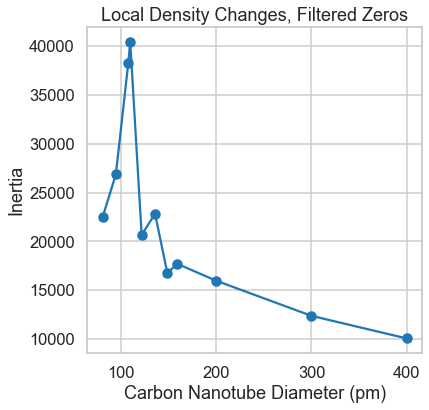

In [60]:
# Plot of Inertia vs CNT Diameter, Filtered Zeros'

# Sum of square distance between point xi and cluster centroid location
# Metric for similar number of points between clusters

# plot data
plt.plot(CNT_Diameters, inertia_list)
plt.scatter(CNT_Diameters, inertia_list)


plt.title('Local Density Changes, Filtered Zeros')
plt.xlabel('Carbon Nanotube Diameter (pm)')
plt.ylabel('Inertia');

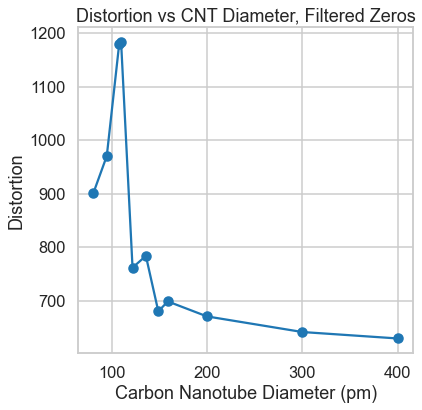

In [61]:
# Plot of Distortion vs CNT Diameter, Filtered Zeros'

# Sum of average squared distance between point xi and cluster centroid location

# Metric for similarity of points within clusters,
# smaller value cooresponds to tighter cluster

# plot data
plt.plot(CNT_Diameters, distortion_list)
plt.scatter(CNT_Diameters, distortion_list)

plt.title('Distortion vs CNT Diameter, Filtered Zeros')
plt.xlabel('Carbon Nanotube Diameter (pm)')
plt.ylabel('Distortion');

In [62]:
All_data

,Radius,Density,CNT_Diameter
0,8.300000e-12,1771.826029,81
1,2.000000e-11,1893.003052,81
2,2.610000e-11,2016.161799,81
3,3.100000e-11,2140.651023,81
4,3.520000e-11,2264.489690,81
...,...,...,...
595,2.030000e-09,0.000000,400
596,2.030000e-09,0.000000,400
597,2.030000e-09,0.000000,400
598,2.030000e-09,0.000000,400


In [ ]:
# normalize data 

# normalize radius with respect to carbon-carbon radius
# normalize density with respect to standard bulk density of water

for ind in range(0,11):
    
    # carbon to carbon radius
    D_cnt = (0.5*CNT_Diameters[ind]*10**-12)

    # index and normalize values to multi-level-index data frame
    
    # radius
    r_ind = (2*ind)
    CNT_data.iloc[:,[r_ind]] = (CNT_data.iloc[:,[r_ind]]) / D_cnt
    
    # density
    d_ind = (r_ind + 1)
    CNT_data.iloc[:,[d_ind]] = (CNT_data.iloc[:,[d_ind]]) / 1000

# normalized data for multi-level-index
CNT_data

In [ ]:
# add labels to data set

Label_data = Label_Clusters(Cluster_data,km=[], num_clusters = n_opt)

Label_data

In [ ]:
# correlations between features and labels

Label_data.corr()

In [ ]:
# distribution of clusters

Label_data['Cluster Label'].hist()

In [ ]:
# Additional Code

In [ ]:
# manually, populate multi-level-index dataset

# raw radial data
CNT_data['95', 'Radius'] = CNT095['Radius']
CNT_data['110', 'Radius'] = CNT110['Radius']
CNT_data['122', 'Radius'] = CNT122['Radius']
CNT_data['136', 'Radius'] = CNT136['Radius']
CNT_data['159', 'Radius'] = CNT159['Radius']
CNT_data['200', 'Radius'] = CNT200['Radius']
CNT_data['300', 'Radius'] = CNT300['Radius']
CNT_data['400', 'Radius'] = CNT400['Radius']

# raw density data
CNT_data['95', 'Density'] = CNT095['Density']
CNT_data['110', 'Density'] = CNT110['Density']
CNT_data['122', 'Density'] = CNT122['Density']
CNT_data['136', 'Density'] = CNT136['Density']
CNT_data['159', 'Density'] = CNT159['Density']
CNT_data['200', 'Density'] = CNT200['Density']
CNT_data['300', 'Density'] = CNT300['Density']
CNT_data['400', 'Density'] = CNT400['Density']


In [ ]:
# manually, populate normalized multi-level-index dataset

# normalize radius with respect to carbon-carbon radius
CNT_data['95', 'Radius'] = CNT095['Radius']/(0.5*95*10**-12)
CNT_data['110', 'Radius'] = CNT110['Radius']/(0.5*110*10**-12)
CNT_data['122', 'Radius'] = CNT122['Radius']/(0.5*122*10**-12)
CNT_data['136', 'Radius'] = CNT136['Radius']/(0.5*136*10**-12)
CNT_data['159', 'Radius'] = CNT159['Radius']/(0.5*159*10**-12)
CNT_data['200', 'Radius'] = CNT200['Radius']/(0.5*159*10**-12)
CNT_data['300', 'Radius'] = CNT300['Radius']/(0.5*300*10**-12)
CNT_data['400', 'Radius'] = CNT400['Radius']/(0.5*400*10**-12)

# normalize density with respect to standard bulk density of water
CNT_data['95', 'Density'] = CNT095['Density']/1000
CNT_data['110', 'Density'] = CNT110['Density']/1000
CNT_data['122', 'Density'] = CNT122['Density']/1000
CNT_data['136', 'Density'] = CNT136['Density']/1000
CNT_data['159', 'Density'] = CNT159['Density']/1000
CNT_data['200', 'Density'] = CNT200['Density']/1000
CNT_data['300', 'Density'] = CNT300['Density']/1000
CNT_data['400', 'Density'] = CNT400['Density']/1000


In [ ]:
# Compare number of unique values vs data set with plot

# More values for zero will lead to lower inertia and distortion values

# plot data
plt.plot(CNT_Diameters, unique_list)
plt.scatter(CNT_Diameters, unique_list)
plt.xlabel('Carbon Nanotube Diameter (pm)')
plt.ylabel('Unique Values in Data set');

In [ ]:
# optimizing number of clusters

# initialize empty list
opt_distortion = []

# number of clusters range that will be optimized over
list_num_clusters = list(range(1,12))

for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(Cluster_data)
    distortion_val = ((cluster_distortions(X, km, num_clusters=num_clusters))['Distortion']).sum()
    opt_distortion.append(distortion_val)
    
plt.plot(list_num_clusters, opt_distortion)
plt.scatter(list_num_clusters, opt_distortion)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion');

In [ ]:
# cluster plotting function

# displays data in 2 dimensions and highlights the clusters up to 7 colors

def display_cluster(X,km=[],num_clusters=0):
    
    # color list ie., blue, red, green, etc.
    color = 'brgcmyk'
    # transparency of color
    alpha = 0.5
    # marker size
    s = 20
    
    # for no clusters create scatter plot
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    
    # for num_clusters > 0, create scatter plot of points and centroids and label 
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)